# Test Scores and Grocery Stores
### An inquiry into education testing and food proximity. 
#### by Daniel Ochoa, 2020


<hr>
<hr>




# Table of contents
<ol>
    <li>Introduction</li>
    <li>Data</li>
    <li>Methodology</li>
    <li>Data Exploration and Visualization</li>
    <li>Analysis</li>
    <li>Results</li>
    <li>Conclusion</li>
    <li>References</li>
    <li>Acknowledgement</li>
 </ol>

# Introduction 


This project looks at the relationship between school test scores and the schools proximity to grocery stores. The average family made 1.6 trips to the grocery store each week in 2019 according to <a href="https://www.statista.com/statistics/251728/weekly-number-of-us-grocery-shopping-trips-per-household">Statita.com</a>. Families that have less friction to access of food by having a grocery store nearby may be able to provide a high level of food and nutrition to their children. In addition, <a href="https://www.publicschoolreview.com/blog/how-diet-and-nutrition-impact-a-childs-learning-ability" >Public School Review website </a>, stated poor diets and limited access to food can have a negative impact on learning. "Children with insufficient diets are reported to have more problems with health, academic learning, and psychosocial behavior." By looking at this problem from a data science perspective we look to find larger patterns in the data. 

The task a hand:

The county of Alameda would like to know if there is a meaningful relationship between school test scores and a schools proximity to grocery stores. In addition, can we identify schools which would benefit from new grocery stores being placed nearby. 



# Data
We will look at test data provided by California Department of Education and data from foursquare grocery store locations. We will count how many grocery stores are near each school location. Then we will merge two different data sets to get both the lat and long of each school using geo locator. Then merge test scores into one dataframe. 


#### Test Scores data set:
https://www.cde.ca.gov/ta/ac/cm/datafiles2019.asp

#### Schools Address data set:    
https://www.cde.ca.gov/SchoolDirectory/ExportSelect?simpleSearch=N&address=&city=&counties=&districts=&cdscode=&charter=&magnet=&name=&nps=&search=1&zip=&yearround=&status=1&types=&order=0&multilingual=&qsc=10642&qdc=10642

#### Geolocator:
Acquire latitude and longitude for each school from their address. 
https://pypi.org/project/geolocation-python/

#### Foursquare:
Count number of grocery stores nearby each school. 
https://developer.foursquare.com/


In [22]:
import urllib.request
import lxml
url_table = 'https://www.cde.ca.gov/ta/ac/cm/mathpartrate19.asp'
with urllib.request.urlopen(url_table) as response:
   html = response.read()
df = pd.read_html(html,skiprows=1)[0]
df


,0,1,2,3
0,1,cds,CDS Code,14-character string
1,2,rtype,Record Type,S= School Record D=District/LEA Record X=Sta...
2,3,schoolname,School Name,Text
3,4,districtname,District Name,Text
4,5,countyname,County Name,Text
5,6,charter_flag,Charter School Flag,Y or blank
6,7,coe_flag,County Office of Education Flag,Y or blank
7,8,dass_flag,Dashboard Alternative School Status (DASS) Flag,Y or blank
8,9,studentgroup,Student Group,ALL=All Students AA=Black/African American A...
9,10,enrolled,Number of students included in the participati...,Integer


### Data wrangle

In [171]:
# http://www3.cde.ca.gov/researchfiles/cadashboard/mathdownload2019.xlsx
# local file mathpratedownload2019.xlsx

# data_testing_a = pd.read_excel('http://www3.cde.ca.gov/researchfiles/cadashboard/mathdownload2019.xlsx', index_col=0)
data_testing_a = pd.read_excel('http://www3.cde.ca.gov/researchfiles/cadashboard/mathpratedownload2019.xlsx', index_col=None)

data_testing_a.head(50)

,cds,rtype,schoolname,districtname,countyname,charter_flag,coe_flag,dass_flag,studentgroup,enrolled,tested,prate,reportingyear
0,0,X,State of California,State of California,NaN,NaN,NaN,NaN,AA,175091,169522,97,2019
1,0,X,State of California,State of California,NaN,NaN,NaN,NaN,AI,16447,15826,97,2019
2,0,X,State of California,State of California,NaN,NaN,NaN,NaN,ALL,3279795,3210894,98,2019
3,0,X,State of California,State of California,NaN,NaN,NaN,NaN,AS,302554,299720,100,2019
4,0,X,State of California,State of California,NaN,NaN,NaN,NaN,EL,1004787,991539,99,2019
5,0,X,State of California,State of California,NaN,NaN,NaN,NaN,ELO,536319,526112,99,2019
6,0,X,State of California,State of California,NaN,NaN,NaN,NaN,EO,1862729,1815958,98,2019
7,0,X,State of California,State of California,NaN,NaN,NaN,NaN,FI,78494,77618,99,2019
8,0,X,State of California,State of California,NaN,NaN,NaN,NaN,FOS,20942,19689,95,2019
9,0,X,State of California,State of California,NaN,NaN,NaN,NaN,HI,1799476,1770219,99,2019


In [172]:
df = pd.DataFrame(data_testing_a)
df.shape
df.columns

# df_alameda = df.loc[df['countyname'] == 'Alameda']

Index(['cds', 'rtype', 'schoolname', 'districtname', 'countyname',
       'charter_flag', 'coe_flag', 'dass_flag', 'studentgroup', 'enrolled',
       'tested', 'prate', 'reportingyear'],
      dtype='object')

In [173]:
df_alameda = df.loc[df['countyname'] == 'Alameda']
# remove NaN values i school name.
df_alameda = df_alameda[df_alameda['schoolname'].notna()]
df_alameda.shape

(5545, 13)

In [167]:
df_sg = df_alameda.groupby(by='studentgroup').mean()
df_sg.sort_values(by='prate', ascending=False)

,cds,enrolled,tested,prate,reportingyear
studentgroup,,,,,
RFP,1.607170e+12,45.595041,45.154270,97.760331,2019.0
AS,1.609899e+12,88.857550,88.056980,97.717949,2019.0
FI,1.611213e+12,17.758842,17.485531,96.919614,2019.0
AI,1.612397e+12,1.876543,1.820988,96.611111,2019.0
MR,1.608318e+12,20.447368,19.783626,96.266082,2019.0
HI,1.604635e+12,110.432361,107.251989,95.588859,2019.0
SED,1.604555e+12,149.396783,144.552279,95.568365,2019.0
ALL,1.604656e+12,318.206349,309.410053,95.378307,2019.0
EL,1.604556e+12,98.691689,96.522788,95.217158,2019.0


In [174]:
df_alameda = df_alameda.loc[df_alameda['studentgroup'] == 'ALL']

# modify to only keep relavent columns
df_ala = df_alameda[['schoolname','cds','districtname','charter_flag','studentgroup','enrolled','tested','prate']]

df_ala.head(15)

,schoolname,cds,districtname,charter_flag,studentgroup,enrolled,tested,prate
33,Envision Academy for Arts & Technology,1100170112607,Alameda County Office of Education,Y,ALL,87,84,97
47,Community School for Creative Education,1100170123968,Alameda County Office of Education,Y,ALL,143,139,98
61,Yu Ming Charter,1100170124172,Alameda County Office of Education,Y,ALL,238,232,98
74,Urban Montessori Charter,1100170125567,Alameda County Office of Education,Y,ALL,202,197,98
88,Alameda County Juvenile Hall/Court,1100170130401,Alameda County Office of Education,NaN,ALL,24,4,17
100,Alameda County Community,1100170130419,Alameda County Office of Education,NaN,ALL,39,13,34
112,Oakland Unity Middle,1100170131581,Alameda County Office of Education,Y,ALL,175,174,100
127,Connecting Waters Charter - East Bay,1100170136101,Alameda County Office of Education,Y,ALL,230,228,100
142,Opportunity Academy,1100170136226,Alameda County Office of Education,Y,ALL,34,3,9
153,Aurum Preparatory Academy,1100170137448,Alameda County Office of Education,Y,ALL,85,80,95


In [170]:
# only keep all value which is all students from count

# df_ala['schoolname'].unique()
df_ala_prate = df_alameda[['cds','schoolname','districtname','studentgroup','prate']]

df_ala_prate_school = df_ala_prate.groupby(by='schoolname').mean()

df_ala_prate_school = df_ala_prate_school.sort_values(by='prate', ascending=False)
df_ala_prate_school
df_ala_prate.groupby(by='districtname').count()


,cds,schoolname,studentgroup,prate
districtname,,,,
Alameda County Office of Education,12,12,12,12
Alameda Unified,21,21,21,21
Albany City Unified,6,6,6,6
Berkeley Unified,17,17,17,17
California School for the Blind (State Special Schl),1,1,1,1
California School for the Deaf-Fremont (State Special Schl),1,1,1,1
Castro Valley Unified,14,14,14,14
Dublin Unified,12,12,12,12
Emery Unified,2,2,2,2


In [192]:
df_ala_prate.head()
data_location_s.dtypes

cds               object
county            object
street_address    object
city              object
state             object
zip               object
dtype: object

In [154]:
#export data on site get school addres to look up lat and long
# https://www.cde.ca.gov/SchoolDirectory/ExportSelect?simpleSearch=N&address=&city=&counties=&districts=&cdscode=&charter=&magnet=&name=&nps=&search=1&zip=&yearround=&status=1&types=&order=0&multilingual=&qsc=10642&qdc=10642
#create a df to have address of each school 

# http://www3.cde.ca.gov/researchfiles/cadashboard/mathdownload2019.xlsx
# local file mathpratedownload2019.xlsx

# data_testing_a = pd.read_excel('http://www3.cde.ca.gov/researchfiles/cadashboard/mathdownload2019.xlsx', index_col=0)
data_location_s = pd.read_excel('CDESchoolDirectoryExport.xlsx', index_col=0)

data_location_s = data_location_s[5:]

# print(df_loc_s.loc[df_loc_s['California Department of Education'] == 'Record Type'])

data_location_s.head(5)



,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
California Department of Education,,,,,,,,,,,,,,,,,,,,
School,01100170130419,06830,No Data,Alameda,Alameda County Office of Education,Alameda County Community,N,Y,N,313 West Winton Ave.,Hayward,CA,94544-1136,313 West Winton Ave.,Hayward,CA,94544-1136,(510) 670-4590,No Data,chobbs@acoe.org
School,01100170130401,09264,No Data,Alameda,Alameda County Office of Education,Alameda County Juvenile Hall/Court,N,Y,N,2500 Fairmont Ave.,San Leandro,CA,94578-1005,2500 Fairmont Ave.,San Leandro,CA,94578-1005,(510) 670-7609,No Data,smoffatt@acoe.org
School,01100176106751,08672,No Data,Alameda,Alameda County Office of Education,Alameda County Special Education,N,Y,No Data,313 West Winton Ave.,Hayward,CA,94544-1136,313 West Winton Ave.,Hayward,CA,94544-1136,(510) 723-3857,No Data,mvaughan@acoe.org
School,01100170137448,14335,0602459,Alameda,Alameda County Office of Education,Aurum Preparatory Academy,Y,Y,N,1034 66th Ave.,Oakland,CA,94621-3536,1034 66th Ave.,Oakland,CA,94621-3536,(415) 763-8974,info@aurumprep.org,dhardin@aurumprep.org
School,01100170123968,12844,0601691,Alameda,Alameda County Office of Education,Community School for Creative Education,Y,Y,Y,2111 International Blvd.,Oakland,CA,94606-4903,2111 International Blvd.,Oakland,CA,94606-4903,(510) 686-4131,info@communityschoolforcreativeeducation.org,moniqueb@communityschoolforcreativeeducation.org


In [204]:
data_location_s = pd.DataFrame(data_location_s)

data_location_s.head()

try:
    data_location_s = data_location_s.rename(columns={'Unnamed: 1': 'cds', 
    #                                                   'Unnamed: 2': 'federal_school_id',
                                                      'Unnamed: 4': 'county',
                                                      'Unnamed: 10': 'street_address',
                                                      'Unnamed: 11': 'city',
                                                      'Unnamed: 12': 'state',
                                                      'Unnamed: 3': 'zip',

                                                     })
except:
    print("already")
    
data_location_s = data_location_s[['cds','county','street_address','city','state','zip']]
# data_location_s['cds'].astype('int64', copy=False)
# data_location_s[df_alameda['cds'].notna()]
data_location_s.shape
# data_location_s['cds'].astype('int64')
data_location_s.dtypes
# data_location_s.head(20)

cds                int64
county            object
street_address    object
city              object
state             object
zip               object
dtype: object

In [206]:
#merge the two school dfs on CDScode
#clean up data so can merge. change data types to int. drop nan's
print(data_location_s['cds'].dtypes)
data_location_s = data_location_s.dropna()
data_location_s['cds'] = data_location_s['cds'].astype('int64')
df_ala_prate['cds'] = df_ala_prate['cds'].astype('int64')

print(df_ala_prate['cds'].dtypes)

df_data_schools_full = pd.merge(data_location_s, df_ala_prate, left_on='cds', right_on='cds')

df_data_schools_full.shape
df_data_schools_full.head()

int64
int64


,cds,county,street_address,city,state,zip,schoolname,districtname,studentgroup,prate
0,1100170130419,Alameda,313 West Winton Ave.,Hayward,CA,No Data,Alameda County Community,Alameda County Office of Education,ALL,34
1,1100170130401,Alameda,2500 Fairmont Ave.,San Leandro,CA,No Data,Alameda County Juvenile Hall/Court,Alameda County Office of Education,ALL,17
2,1100170137448,Alameda,1034 66th Ave.,Oakland,CA,0602459,Aurum Preparatory Academy,Alameda County Office of Education,ALL,95
3,1100170123968,Alameda,2111 International Blvd.,Oakland,CA,0601691,Community School for Creative Education,Alameda County Office of Education,ALL,98
4,1100170136101,Alameda,703 C St.,Union City,CA,0602159,Connecting Waters Charter - East Bay,Alameda County Office of Education,ALL,100


In [244]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


def get_latlong(address):
    address = str(address)
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    try: 
        latitude = float(location.latitude)
        longitude = float(location.longitude)
#         print('The geograpical coordinate of {}, {}, {}'.format(address,latitude, longitude))
        return [latitude), longitude]
    except:
        print("return none")
        return [None, None]
        

In [523]:
import time
slice_df_data_schools_full = df_data_schools_full[:5]
#add lat and lng colums
#the api hits a rate limit at times so need to make a second call/try to get all data
df_data_schools_full['lat'] = 0.00000
df_data_schools_full['lng'] = 0.00000
for index, row in df_data_schools_full.iterrows():
    ad_find_ll =  '{} {}, {}'.format(row['street_address'],row['city'], row['state'])
   
 
    lat,lng = get_latlong(ad_find_ll)
    if lat != None:
        df_data_schools_full.at[index, 'lat'] = float(lat)
        df_data_schools_full.at[index, 'lng'] = float(lng)
    else:
        df_data_schools_full.at[index, 'lat'] = None
        df_data_schools_full.at[index, 'lng'] = None

    print('.')



print(df_data_schools_full[['street_address','lat', 'lng']].head())


.
.
.
.


KeyboardInterrupt: 

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 12, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt


.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


KeyboardInterrupt: 

In [291]:
# pd.set_option("display.precision", 20)
#checked to make sure precision was not getting cut off at 6 decimals
df_data_schools_full.head(20)
print(df_data_schools_full.shape)
#need to remove any nan or 0 values

# check point ot save df into csv file. 
# df_data_schools_full.to_csv('add_lt.csv', index=False)

print(df_data_schools_full.shape)

#drop nan values for lat long. Some locations did not return lat long and are dropped. 
df_data_schools_full = df_data_schools_full[df_data_schools_full['lat'].notna()]
df_data_schools_full.shape
df_data_schools_full.head()

(344, 12)
(344, 12)


,cds,county,street_address,city,state,zip,schoolname,districtname,studentgroup,prate,lat,lng
0,1100170130419,Alameda,313 West Winton Ave.,Hayward,CA,No Data,Alameda County Community,Alameda County Office of Education,ALL,34,37.65656959999999742195,-122.10099270000000615255
2,1100170137448,Alameda,1034 66th Ave.,Oakland,CA,0602459,Aurum Preparatory Academy,Alameda County Office of Education,ALL,95,37.75947599999999937381,-122.19720399999999926877
3,1100170123968,Alameda,2111 International Blvd.,Oakland,CA,0601691,Community School for Creative Education,Alameda County Office of Education,ALL,98,37.78501547202996846408,-122.23876125189154606687
4,1100170136101,Alameda,703 C St.,Union City,CA,0602159,Connecting Waters Charter - East Bay,Alameda County Office of Education,ALL,100,37.60356120491848486154,-122.02460729332491951027
5,1100176001788,Alameda,9860 Sunnyside St.,Oakland,CA,0601718,Cox Academy,Alameda County Office of Education,ALL,100,37.74619587748374982539,-122.16154926555347515205


# Methodology
We will use the school data which includes tests and location to explore how many supermarkets are nearby each school. Foursquare will be called by latitude and longitude of each school location to count nearby supermarkets. Then we will visualize the data and see if there are machine learning models like Kmeans, SVM, or Decision trees that work well with the data. 

In [86]:
# Get foursquare cred
CLIENT_ID = 'FSHMLIAXR0CBXRBDH2EG52IXQGNX3G3LJBY4RORW2LHTRNP5' # your Foursquare ID
CLIENT_SECRET = 'AD4ABDPMVGCNKJGQ2R5QLGUHGFPWTOG4ABSAEAV3H34G52B0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FSHMLIAXR0CBXRBDH2EG52IXQGNX3G3LJBY4RORW2LHTRNP5
CLIENT_SECRET:AD4ABDPMVGCNKJGQ2R5QLGUHGFPWTOG4ABSAEAV3H34G52B0


In [ ]:
# count # food locations data withing 1 mile radius


In [309]:
query = 'Supermarket'
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1609 # define radius
# radius = 1600 # define radius in meters 1609 meters in a mile

q_latitude = 37.65656959999999742195
q_longitude= -122.10099270000000615255

#categores 
# Supermarket = 52f2ab2ebcbc57f1066b8b46
# Farmers Market = 4bf58dd8d48988d1fa941735
# Organic Grocery = 52f2ab2ebcbc57f1066b8b45
# Food & Drink Shop = 4bf58dd8d48988d1f9941735
#

# url_explore = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&query={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    q_latitude, 
    q_longitude, 
    radius, 
    query,
    LIMIT
)
url


'https://api.foursquare.com/v2/venues/explore?&client_id=FSHMLIAXR0CBXRBDH2EG52IXQGNX3G3LJBY4RORW2LHTRNP5&client_secret=AD4ABDPMVGCNKJGQ2R5QLGUHGFPWTOG4ABSAEAV3H34G52B0&v=20180605&ll=37.6565696,-122.1009927&radius=1600&query=Supermarket&limit=100'

In [310]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ede933b71c428001bbdf420'},
 'response': {'headerLocation': 'Hayward',
  'headerFullLocation': 'Hayward',
  'headerLocationGranularity': 'city',
  'query': 'supermarket',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 37.670969614400015,
    'lng': -122.08283763273846},
   'sw': {'lat': 37.64216958559998, 'lng': -122.11914776726155}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b7c964bf964a5207c9c2fe3',
       'name': 'Lucky',
       'location': {'address': '25151 Santa Clara St.',
        'crossStreet': 'at W Jackson St.',
        'lat': 37.64804,
        'lng': -122.090195,
        'labeledLatLngs': [{'label': 'display',
          'lat': 37.64804,
          'lng': -122.090195}],
        'distance': 1344,
        'post

In [311]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [314]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(20)
print(len(nearby_venues))



4


In [336]:
# create one function that loops through all schools and adds num of supermarkets to df_data_schools_full

df_data_schools_full 
# add num supermarkets to df 
df_data_schools_full['num_supermarkets_inside_1mi'] = 0
df_data_schools_full['count'] = 0

def add_num_venue():
    #set vars
    query = 'Supermarket'
    LIMIT = 300
#     radius = 1609
    radius = 100
    count  = 0
    
    #create a for loop get each row of df_data_sculls_full
    for index, row in df_data_schools_full.iterrows():
        supermarkets_count = 0
        count += 1
#         if count > 5:
#             return ["hit count limit"]
        
        ad_find_ll =  '{} {}, {}'.format(row['street_address'],row['city'], row['state'])
        lat = row['lat']
        lng = row['lng']
        query = 'Supermarket'
        LIMIT = 300 # limit of number of venues returned by Foursquare API
        radius = 1609 # define radius
        # radius = 1600 # define radius in meters 1609 meters in a mile
        # url_explore = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&query={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius, 
                query,
                LIMIT
                )
        
        try:
            results = requests.get(url).json()
#             print(results)

            venues = results['response']['groups'][0]['items']

            nearby_venues = json_normalize(venues) # flatten JSON

            # filter columns
            filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
            nearby_venues =nearby_venues.loc[:, filtered_columns]

            # filter the category for each row
            nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

            # clean columns
            nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

            nearby_venues.head(20)
#             print(len(nearby_venues))
#             print(nearby_venues.head(20))
            supermarkets_count = len(nearby_venues)
            print("Num of iterations ",count)
        
        
            print("add num of supermarkets", supermarkets_count)
#             df_data_schools_full.at[index, 'num_supermarkets_inside_1mi'] = float(lat)
            df_data_schools_full.at[index, 'num_supermarkets_inside_1mi'] = len(nearby_venues)
    
            
        except:
            
            print("did not work", )
            print("supermarket count", supermarkets_count)
            df_data_schools_full.at[index, 'num_supermarkets_inside_1mi'] = 0
    
    

# df_test_sm_count.head()
print(add_num_venue())
print(df_data_schools_full.head())

Num of iterations  1
add num of supermarkets 4
Num of iterations  2
add num of supermarkets 5
Num of iterations  3
add num of supermarkets 7
did not work
supermarket count 0
Num of iterations  5
add num of supermarkets 2
Num of iterations  6
add num of supermarkets 12
Num of iterations  7
add num of supermarkets 3
Num of iterations  8
add num of supermarkets 5
Num of iterations  9
add num of supermarkets 5
Num of iterations  10
add num of supermarkets 4
Num of iterations  11
add num of supermarkets 3
Num of iterations  12
add num of supermarkets 4
Num of iterations  13
add num of supermarkets 3
Num of iterations  14
add num of supermarkets 4
Num of iterations  15
add num of supermarkets 4
Num of iterations  16
add num of supermarkets 2
Num of iterations  17
add num of supermarkets 1
Num of iterations  18
add num of supermarkets 3
Num of iterations  19
add num of supermarkets 2
Num of iterations  20
add num of supermarkets 2
Num of iterations  21
add num of supermarkets 4
did not work
s

Num of iterations  179
add num of supermarkets 4
Num of iterations  180
add num of supermarkets 3
Num of iterations  181
add num of supermarkets 2
Num of iterations  182
add num of supermarkets 2
Num of iterations  183
add num of supermarkets 2
Num of iterations  184
add num of supermarkets 5
Num of iterations  185
add num of supermarkets 2
Num of iterations  186
add num of supermarkets 3
Num of iterations  187
add num of supermarkets 2
Num of iterations  188
add num of supermarkets 1
Num of iterations  189
add num of supermarkets 14
Num of iterations  190
add num of supermarkets 14
Num of iterations  191
add num of supermarkets 4
Num of iterations  192
add num of supermarkets 4
Num of iterations  193
add num of supermarkets 4
Num of iterations  194
add num of supermarkets 3
Num of iterations  195
add num of supermarkets 1
Num of iterations  196
add num of supermarkets 2
Num of iterations  197
add num of supermarkets 2
did not work
supermarket count 0
did not work
supermarket count 0
N

# Data Exploration and Visualization

In [423]:
#add a count col to be able to visualize.
df_data_schools_full['count'] = 1

# df_data_schools_full['above95_pass'] = 0
df_data_schools_full['above94_prate'] = df_data_schools_full['prate'].apply(lambda x: 1 if (x>94)  else 0)

df_data_schools_full.describe()


,cds,prate,lat,lng,num_supermarkets_inside_1mi,count,above95_pass,above94_prate
count,3.44000000000000000000e+02,344.00000000000000000000,344.00000000000000000000,344.00000000000000000000,344.00000000000000000000,344.0,344.0,344.00000000000000000000
mean,1.60541091319862792969e+12,95.77034883720929769879,37.71132551331145066342,-122.10978416925735245968,2.54941860465116265644,1.0,0.0,0.87209302325581394832
std,1.02202812186236557007e+11,11.31330360071375551456,0.09841225513963286486,0.14238370871645122939,2.34437474723104077867,0.0,0.0,0.33447270639238335654
min,1.10017011260700000000e+12,0.00000000000000000000,37.50040460000000308582,-122.30101399999999500778,0.00000000000000000000,1.0,0.0,0.00000000000000000000
25%,1.61176604286675000000e+12,97.00000000000000000000,37.65512199560811268384,-122.22747283151784358779,1.00000000000000000000,1.0,0.0,1.00000000000000000000
50%,1.61242611703950000000e+12,99.00000000000000000000,37.71858269999999890842,-122.14825565321609701641,2.00000000000000000000,1.0,0.0,1.00000000000000000000
75%,1.61259600211900000000e+12,100.00000000000000000000,37.78233765000000232703,-122.02467332490982698801,4.00000000000000000000,1.0,0.0,1.00000000000000000000
max,1.75119600271100000000e+12,100.00000000000000000000,37.89784199999999714237,-121.71912700000000029377,15.00000000000000000000,1.0,0.0,1.00000000000000000000


In [424]:
# df_data_schools_full.corr()
df_data_schools_full[["prate","num_supermarkets_inside_1mi","above94_prate"]].corr()

,prate,num_supermarkets_inside_1mi,above94_prate
prate,1.00000000000000000000,-0.04733248698853608633,0.69103099224559150215
num_supermarkets_inside_1mi,-0.04733248698853608633,1.00000000000000000000,-0.03281417467967079338
above94_prate,0.69103099224559150215,-0.03281417467967079338,1.00000000000000000000


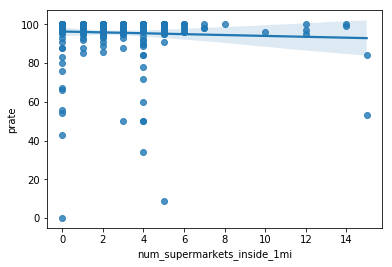

In [420]:
# print(df_data_schools_full.tail())

import seaborn as sns
#find ptc profit and compare it to time to trade. 
sns.regplot(x="num_supermarkets_inside_1mi",y="prate",data=df_data_schools_full)




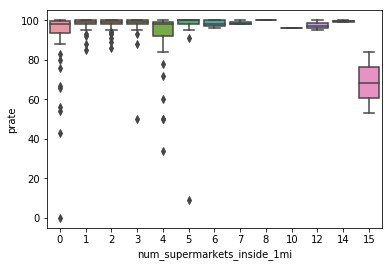

In [426]:
sns.boxplot(x='num_supermarkets_inside_1mi', y='prate',data=df_data_schools_full)

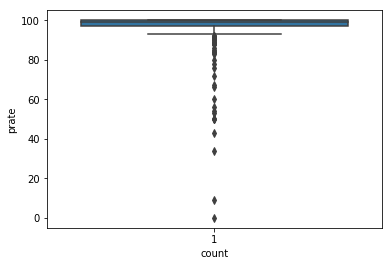

In [427]:
sns.boxplot(x='count', y='prate',data=df_data_schools_full)

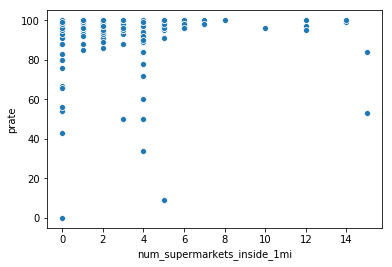

In [428]:

# sns.regplot(x="num_supermarkets_inside_1mi",y="prate",data=df_data_schools_full)
ax = sns.scatterplot(x="num_supermarkets_inside_1mi", y="prate", data=df_data_schools_full)
# create a group by and see what mean or median prate is per group of supermarket stores. 
df_group_num_sm = df_data_schools_full.groupby(['num_supermarkets_inside_1mi']).mean()

In [ ]:
# create a group by and see what mean or median prate is per group of supermarket stores. 
df_group_num_sm = df_data_schools_full.groupby(['num_supermarkets_inside_1mi']).mean()
# df_group_num_sm

ax = sns.scatterplot(x=df_group_num_sm.index, y="prate", data=df_group_num_sm)
#looks like there is an outlier at 15 grocery stores. 
#otherwise looks like 


# Data analysis: Key visualization
After removing an outlier of 15 grocery stores we arrive at a clear regression line.

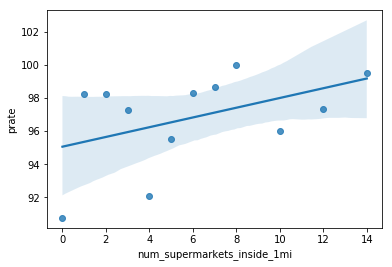

In [518]:
#the last row value of 15 seems like an outlier if we drop can make reasonal regression line
# df_group_num_sm[:-2]

df_gnsm = df_group_num_sm[:-1]
sns.regplot(x=df_gnsm.index, y="prate", data=df_gnsm)

(344, 16)
(342, 16)


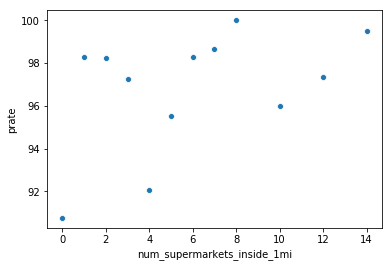

In [431]:
print(df_data_schools_full.shape)

df_s = df_data_schools_full[df_data_schools_full["num_supermarkets_inside_1mi"] < 15]

print(df_s.shape)

df_plt = df_a.groupby(['num_supermarkets_inside_1mi']).mean()
# df_group_num_sm

ax = sns.scatterplot(x=df_plt.index, y="prate", data=df_plt)
#looks like there is an outlier at 15 grocery stores. 
#otherwise looks like


### feature engineering

In [478]:
df_s['above94_prate'] = 0
df_s['above94_prate'] = df_s['prate'].apply(lambda x: 1 if (x>94)  else 0)
# df_s.reset_index(drop=True)
# print(df_s.head())

df_s = df_s[['cds','schoolname','prate','lat','lng', 'num_supermarkets_inside_1mi','above94_prate']].reset_index(drop=True)
df_s.head()

,cds,schoolname,prate,lat,lng,num_supermarkets_inside_1mi,above94_prate
0,1100170130419,Alameda County Community,34,37.65656959999999742195,-122.10099270000000615255,4,0
1,1100170137448,Aurum Preparatory Academy,95,37.75947599999999937381,-122.19720399999999926877,5,1
2,1100170123968,Community School for Creative Education,98,37.78501547202996846408,-122.23876125189154606687,7,1
3,1100170136101,Connecting Waters Charter - East Bay,100,37.60356120491848486154,-122.02460729332491951027,0,1
4,1100176001788,Cox Academy,100,37.74619587748374982539,-122.16154926555347515205,2,1


# preprocess data for attempets at machine learning algos

In [479]:

# X = df_s[['prate','above94_prate' ]]
X = df_s[['num_supermarkets_inside_1mi', 'lat','lng' ]]
print(X[0:5])

y = df_s['prate'].values
print(y[0:5])




   num_supermarkets_inside_1mi                      lat  \
0                            4  37.65656959999999742195   
1                            5  37.75947599999999937381   
2                            7  37.78501547202996846408   
3                            0  37.60356120491848486154   
4                            2  37.74619587748374982539   

                        lng  
0 -122.10099270000000615255  
1 -122.19720399999999926877  
2 -122.23876125189154606687  
3 -122.02460729332491951027  
4 -122.16154926555347515205  
[ 34  95  98 100 100]


# Analysis

### normalize data 

In [480]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.71025962, -0.55172527,  0.05564023],
       [ 1.1764953 ,  0.49474473, -0.6213341 ],
       [ 2.10896666,  0.7544593 , -0.91374458],
       [-1.1546831 , -1.09077528,  0.59311305],
       [-0.22221174,  0.35969725, -0.37045567]])

### train test split

In [481]:
#split into train and test. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (273, 3) (273,)
Test set: (69, 3) (69,)


In [482]:
#knn 
# fit k-means model 
from sklearn.neighbors import KNeighborsClassifier
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

#model prediction 

knn_yhat = neigh.predict(X_test)
knn_yhat[0:5]

#test accuracy 
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(knn_yhat==y_test)/np.sqrt(knn_yhat.shape[0])

mean_acc

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

print('new mean ',mean_acc)

The best accuracy was with 0.3333333333333333 with k= 8
new mean  [0.2173913  0.15942029 0.2173913  0.2173913  0.26086957 0.28985507
 0.31884058 0.33333333 0.33333333]


In [483]:
#decision Tree
# import model and create classifier
# X_train, X_test, y_train, y_test
from sklearn.tree import DecisionTreeClassifier
testTree = DecisionTreeClassifier(criterion="entropy", max_depth = 9)
testTree # it shows the default parameters
testTree#predictions 

testTree.fit(X_train,y_train)
predTree = testTree.predict(X_test)
# metrics.accuracy_score(y_test, predTree)
print (predTree [0:5])
print ('y ',y_test [0:100])
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))


[ 98  99 100  96  98]
y  [ 95  98  99 100  95  99 100  50  99 100  99  99  96 100 100 100 100  99
 100  99  98  98  96  98  99 100 100  99 100 100 100  95  96 100  96  98
 100 100  43  99  98 100 100 100  96 100 100 100  99 100  95  96  98  99
  67  97  98  97 100 100 100 100  99  96  99  83  95  99 100]
DecisionTrees's Accuracy:  0.30434782608695654


In [484]:
# svm
from sklearn import svm
loanSVM = svm.SVC(kernel='rbf')
loanSVM.fit(X_train, y_train) 

loanSVM_yhat = loanSVM.predict(X_test)
print(loanSVM_yhat [0:5])

from sklearn.metrics import f1_score
loanSVM_f1 = f1_score(y_test, loanSVM_yhat, average='weighted') 
#Jaccard
print("f1 ",loanSVM_f1)

from sklearn.metrics import jaccard_similarity_score
loanSVM_jaccard = jaccard_similarity_score(loanSVM_yhat, yhat)
print("Jaccard ", loanSVM_jaccard)



[100  97 100  99 100]
f1  0.28844454777958617
Jaccard  0.6376811594202898


/Users/ochoa/crypto/venv3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [485]:
a = df_s['num_supermarkets_inside_1mi'].unique()
print(sorted(a))
print(len(a))

df_s.head()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 14]
12


,cds,schoolname,prate,lat,lng,num_supermarkets_inside_1mi,above94_prate
0,1100170130419,Alameda County Community,34,37.65656959999999742195,-122.10099270000000615255,4,0
1,1100170137448,Aurum Preparatory Academy,95,37.75947599999999937381,-122.19720399999999926877,5,1
2,1100170123968,Community School for Creative Education,98,37.78501547202996846408,-122.23876125189154606687,7,1
3,1100170136101,Connecting Waters Charter - East Bay,100,37.60356120491848486154,-122.02460729332491951027,0,1
4,1100176001788,Cox Academy,100,37.74619587748374982539,-122.16154926555347515205,2,1


In [493]:
above_94 = (df_s['above94_prate'] == 1).sum()
below_95 = (df_s['above94_prate'] == 0).sum()
ptc_pass = neg/pos
print(ptc_pass, above_94, below_95)
print(ptc_pass *100, ' of schools do not get above 95 pass rate')

0.14 300 42
14.000000000000002  of schools do not get above 95 pass rate


In [496]:
# Visualize.
# create map



import matplotlib.cm as cm
import matplotlib.colors as colors


import folium # map rendering library

# buckets = df_s['num_supermarkets_inside_1mi'].unique
start_lat = '37.8044'
start_long= '-122.2712'
map_clusters = folium.Map(location=[start_lat, start_long], zoom_start=10)

# set color scheme for the clusters
kclusters = 2
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(df_s['lat'], df_s['lng'], df_s['above94_prate']):
#     print(df_s['lat'], df_s['lng'], df_s['above94_prate'])
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#ff0000']


In [501]:

import matplotlib.cm as cm
import matplotlib.colors as colors


import folium # map rendering library

# buckets = df_s['num_supermarkets_inside_1mi'].unique
start_lat = '37.8044'
start_long= '-122.2712'
map_clusters = folium.Map(location=[start_lat, start_long], zoom_start=10)

# set color scheme for the clusters
kclusters = 14
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(df_s['lat'], df_s['lng'], df_s['num_supermarkets_inside_1mi']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#5a3bfd', '#3176f8', '#09a9ee', '#1dd1e2', '#44eed2', '#6dfdbf', '#92fda9', '#bbee91', '#e2d176', '#ffa95b', '#ff763d', '#ff3b1e', '#ff0000']


In [534]:
#create map that has points for schools that have <95 prate and zero grocery stores near by.
# propose locations for grocery stores, how many would be needed to get to min of 1 for each school 
# that is not pass
# schools which are affluent may not have a grocery store nearby cause easy access to personal transportaion
# how far to people ususally live from the school their children go to. 

df_s.head()
#create df that has all schools that have 0 super markets nearby and above94_prate is 0 

df_lp_no_sm = df_s[df_s["num_supermarkets_inside_1mi"] == 0]
print(df_lp_no_sm.shape)
df_lp_no_sm = df_lp_no_sm[df_lp_no_sm["above94_prate"] == 0]
print(df_lp_no_sm.shape)
# print(df_lp_no_sm.head())



df_lp_no_sm = df_lp_no_sm[df_lp_no_sm["schoolname"] != 'Castro Valley Virtual Academy']
df_lp_no_sm = df_lp_no_sm[df_lp_no_sm["schoolname"] != 'Home and Hospital Program']



df_lp_no_sm = df_lp_no_sm.sort_values(by=['prate'], ascending=True)
# print(df_lp_no_sm.head(13))
df_lp_no_sm['schoolname'].head(13)

(50, 7)
(13, 7)


280                  Rudsdale Continuation
239     Independent Study, Sojourner Truth
274                   Ralph J. Bunche High
211                     Community Day High
207                        Castlemont High
125                               Highland
283                           Skyline High
159                   Vineyard Alternative
165    Decoto School for Independent Study
59               Redwood Continuation High
232                Grass Valley Elementary
Name: schoolname, dtype: object

In [536]:
# buckets = df_s['num_supermarkets_inside_1mi'].unique
start_lat = '37.8044'
start_long= '-122.2712'
map_clusters = folium.Map(location=[start_lat, start_long], zoom_start=10)

# set color scheme for the clusters
kclusters = 1
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = ['red']
print(rainbow)
# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(df_lp_no_sm['lat'], df_lp_no_sm['lng'], df_lp_no_sm['num_supermarkets_inside_1mi']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['red']


# Results

Through data exploration and analysis we plotted a regression line that showed a relationship between higher test scores and more grocery stores nearby, after we removed an outlier. This was the most telling model we built.

<img src="https://testartworks.s3-us-west-2.amazonaws.com/reg_model.png">

It was challenging to build a machine learning model because the correlation of test scores and number of grocery stores nearby was low. We tried k means as an attempt to cluster schools, SVM and Decision Tree. However they did not give predictions higher than .30 F1 score. 

Our final map(image below) has plotted 11 school locations where the pass rate was below 95 percent and there are zero grocery stores nearby. We believe grocery stores placed within one mile of these locations would have a positive impact on test scores. As a note the Castro Valley Virtual Academy and Home and Hospital Program were removed from this filtered final list since students may not have to travel to and from the school. 

<img src="https://testartworks.s3-us-west-2.amazonaws.com/locations_gs.png">

##### List of schools lowest pass rate first, with no grocery stores nearby.
<ol>
    <li>Rudsdale Continuation</li>
<li>Independent Study, Sojourner Truth</li>
    <li>Ralph J. Bunche High</li>
    <li>Community Day High</li>
    <li>Castlemont High</li>
<li>Highland</li>
<li>Skyline High</li>
<li>Vineyard Alternative</li>
    <li>Decoto School for Independent Study</li>
    <li>Redwood Continuation High</li>
    <li>Grass Valley Elementary</li>
</ol>


# Conclusion 

Trying to predict test score pass rates from nearby grocery stores is a tough data science problem. However, we were able to find a pattern and suggest eleven locations for grocery stores to help raise test scores for low performing schools. 

The data tells us a story that there is a relationship between test scores and grocery stores. For better results we could gather more data such as income level, district school budgets and population density. In addition we could look at the change of test scores over time and track where grocery stores were opened and closed. The final map plot shows schools that did not get a pass rate over 95 percent and had no grocery stores nearby. We would suggest that efforts be made to encourage local business to establish a local grocery stores in those areas. Being that many of the lower performing schools had no grocery stores we feel it may have a positive impact on scores. The County of Alameda is given specific results to address the problem of low performing schools based on grocery store proximity. 



# References

### Statista
https://www.statista.com/statistics/251728/weekly-number-of-us-grocery-shopping-trips-per-household
### Public School Review
https://www.publicschoolreview.com/blog/how-diet-and-nutrition-impact-a-childs-learning-ability
### California Department of Education 
https://www.cde.ca.gov/



# Acknowledgment

We would like to express our apprecation for the open data sets provided by the Califonria Department of Education.

https://www.cde.ca.gov/